In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")




In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df=pd.read_csv("/content/drive/MyDrive/weather_1970-2024.csv",skiprows=3)

In [2]:
df=pd.read_csv("weather_data_5_cities.csv",skiprows=7)

In [3]:
df.head()

,location_id,time,temperature_2m (°F),relative_humidity_2m (%),dew_point_2m (°F),apparent_temperature (°F),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°F),soil_temperature_7_to_28cm (°F),soil_temperature_28_to_100cm (°F),soil_temperature_100_to_255cm (°F),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,0,2000-01-01T00:00,4.6,66,-4.2,-5.8,0.0,0.0,0.0,0.02,...,237,31.3,0.1,14.7,19.5,37.1,0.021,0.096,0.101,0.081
1,0,2000-01-01T01:00,4.0,64,-5.3,-6.6,0.0,0.0,0.0,0.02,...,229,32.0,-1.0,14.4,19.5,37.1,0.021,0.096,0.101,0.081
2,0,2000-01-01T02:00,2.8,64,-6.5,-8.1,0.0,0.0,0.0,0.02,...,221,32.8,-1.4,13.9,19.5,37.1,0.021,0.096,0.101,0.081
3,0,2000-01-01T03:00,5.8,59,-5.5,-4.9,0.0,0.0,0.0,0.02,...,214,33.1,2.1,13.7,19.5,37.1,0.021,0.096,0.101,0.081
4,0,2000-01-01T04:00,14.0,41,-5.2,3.7,0.0,0.0,0.0,0.02,...,206,32.4,9.2,13.7,19.5,37.1,0.021,0.096,0.101,0.081


In [4]:
df.shape

(1086240, 31)

In [5]:
df = df.drop('location_id', axis=1)


In [12]:
df.columns = ['time','temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 'rain', 'snowfall', 
              'snow_depth', 'weather_code', 'msl_pressure', 'surface_pressure', 'cloud_cover_total', 
              'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m', 
              'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 'wind_gusts_10m', 'soil_temp_0_7cm', 
              'soil_temp_7_28cm', 'soil_temp_28_100cm', 'soil_temp_100_255cm', 'soil_moisture_0_7cm', 
              'soil_moisture_7_28cm', 'soil_moisture_28_100cm']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086240 entries, 0 to 1086239
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   time                    1086240 non-null  object 
 1   temp_2m                 1086240 non-null  float64
 2   humidity_2m             1086240 non-null  int64  
 3   dew_point_2m            1086240 non-null  float64
 4   apparent_temp           1086240 non-null  float64
 5   precip                  1086240 non-null  float64
 6   rain                    1086240 non-null  float64
 7   snowfall                1086240 non-null  float64
 8   snow_depth              1083600 non-null  float64
 9   weather_code            1086240 non-null  int64  
 10  msl_pressure            1086240 non-null  float64
 11  surface_pressure        1086240 non-null  float64
 12  cloud_cover_total       1086240 non-null  int64  
 13  cloud_cover_low         1086240 non-null  int64  
 14  cl

In [14]:
weather_mapping = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Depositing rime fog',
    51: 'Drizzle: Light',
    53: 'Drizzle: Moderate',
    55: 'Drizzle: Dense',
    56: 'Freezing Drizzle: Light',
    57: 'Freezing Drizzle: Dense',
    61: 'Rain: Slight',
    63: 'Rain: Moderate',
    65: 'Rain: Heavy',
    66: 'Freezing Rain: Light',
    67: 'Freezing Rain: Heavy',
    71: 'Snow fall: Slight',
    73: 'Snow fall: Moderate',
    75: 'Snow fall: Heavy',
    77: 'Snow grains',
    80: 'Rain showers: Slight',
    81: 'Rain showers: Moderate',
    82: 'Rain showers: Violent',
    85: 'Snow showers: Slight',
    86: 'Snow showers: Heavy',
    95: 'Thunderstorm: Slight',
    96: 'Thunderstorm: Moderate',
    99: 'Thunderstorm with heavy hail',
}

df['weather_code'] = df['weather_code'].map(weather_mapping)

In [15]:
df.describe()


,temp_2m,humidity_2m,dew_point_2m,apparent_temp,precip,rain,snowfall,snow_depth,msl_pressure,surface_pressure,...,wind_dir_10m,wind_dir_100m,wind_gusts_10m,soil_temp_0_7cm,soil_temp_7_28cm,soil_temp_28_100cm,soil_temp_100_255cm,soil_moisture_0_7cm,soil_moisture_7_28cm,soil_moisture_28_100cm
count,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.083600e+06,1.086240e+06,1.086240e+06,...,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06,1.086240e+06
mean,5.003568e+01,6.162538e+01,3.509501e+01,4.718924e+01,8.812831e-02,7.190317e-02,1.191786e-02,1.343188e-01,1.015556e+03,8.549635e+02,...,1.805204e+02,2.219216e+01,5.329927e+01,5.310220e+01,5.274631e+01,5.235420e+01,2.410213e-01,2.614590e-01,2.645378e-01,2.961718e-01
std,2.656020e+01,2.348725e+01,2.731775e+01,3.140159e+01,4.364102e-01,4.206719e-01,8.334570e-02,3.831916e-01,9.247281e+00,1.562753e+02,...,9.822389e+01,1.081843e+01,2.526829e+01,2.344044e+01,2.199094e+01,2.047701e+01,1.313753e-01,1.032338e-01,1.043169e-01,9.942665e-02
min,-3.940000e+01,2.000000e+00,-5.030000e+01,-4.890000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.857000e+02,6.067000e+02,...,0.000000e+00,1.100000e+00,-1.620000e+01,1.900000e+00,1.250000e+01,2.250000e+01,0.000000e+00,4.400000e-02,5.900000e-02,8.100000e-02
25%,3.070000e+01,4.400000e+01,1.550000e+01,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.009000e+03,6.945000e+02,...,9.800000e+01,1.400000e+01,3.150000e+01,3.340000e+01,3.330000e+01,3.160000e+01,1.290000e-01,1.460000e-01,1.810000e-01,2.760000e-01
50%,5.120000e+01,6.400000e+01,3.560000e+01,4.620000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.015600e+03,9.301000e+02,...,1.820000e+02,2.020000e+01,5.370000e+01,5.400000e+01,5.240000e+01,4.990000e+01,2.840000e-01,2.890000e-01,2.990000e-01,3.320000e-01
75%,7.200000e+01,8.200000e+01,5.760000e+01,7.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.021900e+03,9.991000e+02,...,2.610000e+02,2.810000e+01,7.480000e+01,7.310000e+01,7.190000e+01,7.040000e+01,3.430000e-01,3.410000e-01,3.400000e-01,3.630000e-01
max,1.185000e+02,1.000000e+02,8.520000e+01,1.198000e+02,4.030000e+01,4.030000e+01,4.830000e+00,2.540000e+00,1.052500e+03,1.044500e+03,...,3.600000e+02,1.177000e+02,1.234000e+02,1.064000e+02,9.800000e+01,9.060000e+01,4.420000e-01,4.390000e-01,4.390000e-01,4.380000e-01


## Observation

### temp_2m:

Mean: Approximately 56.62°F, indicating that the dataset predominantly captures mild temperatures.
Range: From -25.5°F to 106.5°F, suggesting the dataset covers extreme conditions, likely across different seasons and geographic locations.
Standard Deviation: About 19.99°F, indicating considerable variability in temperature readings

### dew_point_2m:

Mean: Around 44.97°F, which indicates relatively comfortable humidity levels, as dew points below 50°F typically correspond to drier air.
Range: From -33.6°F to 82.1°F, showing a wide variability in humidity conditions.

### apparent_temp:

Mean: Approximately 54.03°F, which reflects the perceived temperature taking into account humidity and wind.
Range: From -35.1°F to 112.1°F, again highlighting extremes in perceived temperatures.



### humidity_2m:

Mean: About 67.55%, indicating moderately humid conditions overall.
Range: From 13% to 100%, showing some days of extremely low humidity (possibly desert or dry conditions) and maximum saturation.
### precip:

Mean: Approximately 0.13 inches, suggesting light precipitation on average. However, the maximum value of 45.7 inches indicates some instances of heavy rain or snow events. This suggests that while the overall trend indicates minimal precipitation, there are sporadic occurrences of significant weather events.

### Atmospheric Pressure
msl_pressure and surface_pressure:
Mean: MSL pressure around 1017.19 hPa and surface pressure at 1000.96 hPa, which are typical values for many regions.
Standard Deviations: Indicates moderate variability in pressure readings, potentially affected by weather systems moving through the area.

### cloud Cover and Wind
cloud_cover:

Mean: About 39.60%, indicating a mix of clear and cloudy conditions.
Range: From 0% to 100%, showing the dataset captures days with complete overcast and clear skies.

### wind_speed_10m and wind_speed_100m:

Mean: Around 7.13 m/s at 10m and 12.25 m/s at 100m, indicating that wind speeds are higher at 100m, which is typical due to less surface friction.
Maximum Wind Speed: Up to 28.3 m/s (around 101 km/h), which suggests potential extreme weather conditions like storms.

### Soil Temperature and Moisture
soil_temp_0_7cm:
The dataset should include the soil temperature variations, which are critical for understanding local weather and predicting surface temperature.
Soil moisture statistics (mean around 0.32) suggest variability in moisture content, impacting local temperature predictions.


In [16]:
df.nunique()

time                      217248
temp_2m                     1499
humidity_2m                   99
dew_point_2m                1317
apparent_temp               1609
precip                       181
rain                         181
snowfall                      55
snow_depth                   255
weather_code                  13
msl_pressure                 639
surface_pressure            2025
cloud_cover_total            101
cloud_cover_low              101
cloud_cover_mid              101
cloud_cover_high             101
et0                          920
vpd                          500
wind_speed_10m               656
wind_speed_100m              360
wind_dir_10m                 361
wind_dir_100m                293
wind_gusts_10m              1368
soil_temp_0_7cm             1040
soil_temp_7_28cm             856
soil_temp_28_100cm           682
soil_temp_100_255cm          443
soil_moisture_0_7cm          396
soil_moisture_7_28cm         374
soil_moisture_28_100cm       205
dtype: int

In [17]:
df['snow_depth'].value_counts()

snow_depth
0.00    847263
0.01     52179
0.02     17497
0.03      7924
0.04      4978
         ...  
2.52         5
2.42         5
2.54         4
2.44         4
2.43         3
Name: count, Length: 255, dtype: int64

In [18]:
df.isnull().sum()


time                         0
temp_2m                      0
humidity_2m                  0
dew_point_2m                 0
apparent_temp                0
precip                       0
rain                         0
snowfall                     0
snow_depth                2640
weather_code                 0
msl_pressure                 0
surface_pressure             0
cloud_cover_total            0
cloud_cover_low              0
cloud_cover_mid              0
cloud_cover_high             0
et0                          0
vpd                          0
wind_speed_10m               0
wind_speed_100m              0
wind_dir_10m                 0
wind_dir_100m                0
wind_gusts_10m               0
soil_temp_0_7cm              0
soil_temp_7_28cm             0
soil_temp_28_100cm           0
soil_temp_100_255cm          0
soil_moisture_0_7cm          0
soil_moisture_7_28cm         0
soil_moisture_28_100cm       0
dtype: int64

In [19]:
null_snow_depth_data = df[df['snow_depth'].isnull()]
null_snow_depth_data.head()

,time,temp_2m,humidity_2m,dew_point_2m,apparent_temp,precip,rain,snowfall,snow_depth,weather_code,...,wind_dir_10m,wind_dir_100m,wind_gusts_10m,soil_temp_0_7cm,soil_temp_7_28cm,soil_temp_28_100cm,soil_temp_100_255cm,soil_moisture_0_7cm,soil_moisture_7_28cm,soil_moisture_28_100cm
215160,2024-07-18T00:00,55.0,66,44.1,52.3,0.0,0.0,0.0,NaN,Clear sky,...,56,8.6,53.8,64.4,56.5,44.7,0.013,0.104,0.117,0.192
215161,2024-07-18T01:00,61.6,42,38.3,58.2,0.0,0.0,0.0,NaN,Mainly clear,...,67,4.7,55.5,63.9,56.5,44.7,0.019,0.104,0.117,0.192
215162,2024-07-18T02:00,63.8,39,38.7,60.0,0.0,0.0,0.0,NaN,Clear sky,...,328,12.6,60.7,63.7,56.5,44.7,0.019,0.104,0.117,0.192
215163,2024-07-18T03:00,66.5,35,37.8,61.8,0.0,0.0,0.0,NaN,Clear sky,...,5,18.0,67.4,63.6,56.5,44.7,0.018,0.104,0.117,0.192
215164,2024-07-18T04:00,70.4,28,36.0,65.9,0.0,0.0,0.0,NaN,Clear sky,...,34,25.2,74.6,63.8,56.6,44.7,0.018,0.104,0.117,0.192


In [20]:
null_snow_depth_data.snowfall.value_counts()

snowfall
0.00    2621
0.07       4
0.14       3
0.35       3
0.21       2
1.05       1
1.26       1
0.28       1
0.77       1
0.98       1
0.91       1
0.63       1
Name: count, dtype: int64

In [21]:
df['snow_depth'].fillna(0, inplace=True)


In [22]:
df.duplicated().sum()

0

KeyError: 'soil_moisture_100_255cm'

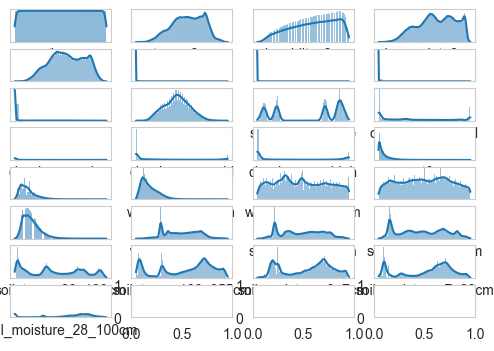

In [23]:
color = sns.color_palette("viridis")
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(8,4, figsize=(6,4))
k = 0
columns = ['time', 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 'rain', 'snowfall', 
              'snow_depth','msl_pressure', 'surface_pressure', 'cloud_cover_total', 
              'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m', 
              'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 'wind_gusts_10m', 'soil_temp_0_7cm', 
              'soil_temp_7_28cm', 'soil_temp_28_100cm', 'soil_temp_100_255cm', 'soil_moisture_0_7cm', 
              'soil_moisture_7_28cm', 'soil_moisture_28_100cm','soil_moisture_100_255cm']

for i in range(8):
    for j in range(4):
        if k < len(columns):

            ax=sns.histplot(x=df[columns[k]],ax=ax1[i][j],kde=True)
            ax.set_ylabel(None); ax.set_yticks([])
            ax.set_xticks([])

            k += 1

        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()


In [24]:
df.humidity_2m.value_counts()

humidity_2m
90    17317
92    17276
91    17142
89    17053
88    16986
      ...  
6       521
5       230
4       109
3        43
2        13
Name: count, Length: 99, dtype: int64

IndexError: index 3 is out of bounds for axis 0 with size 3

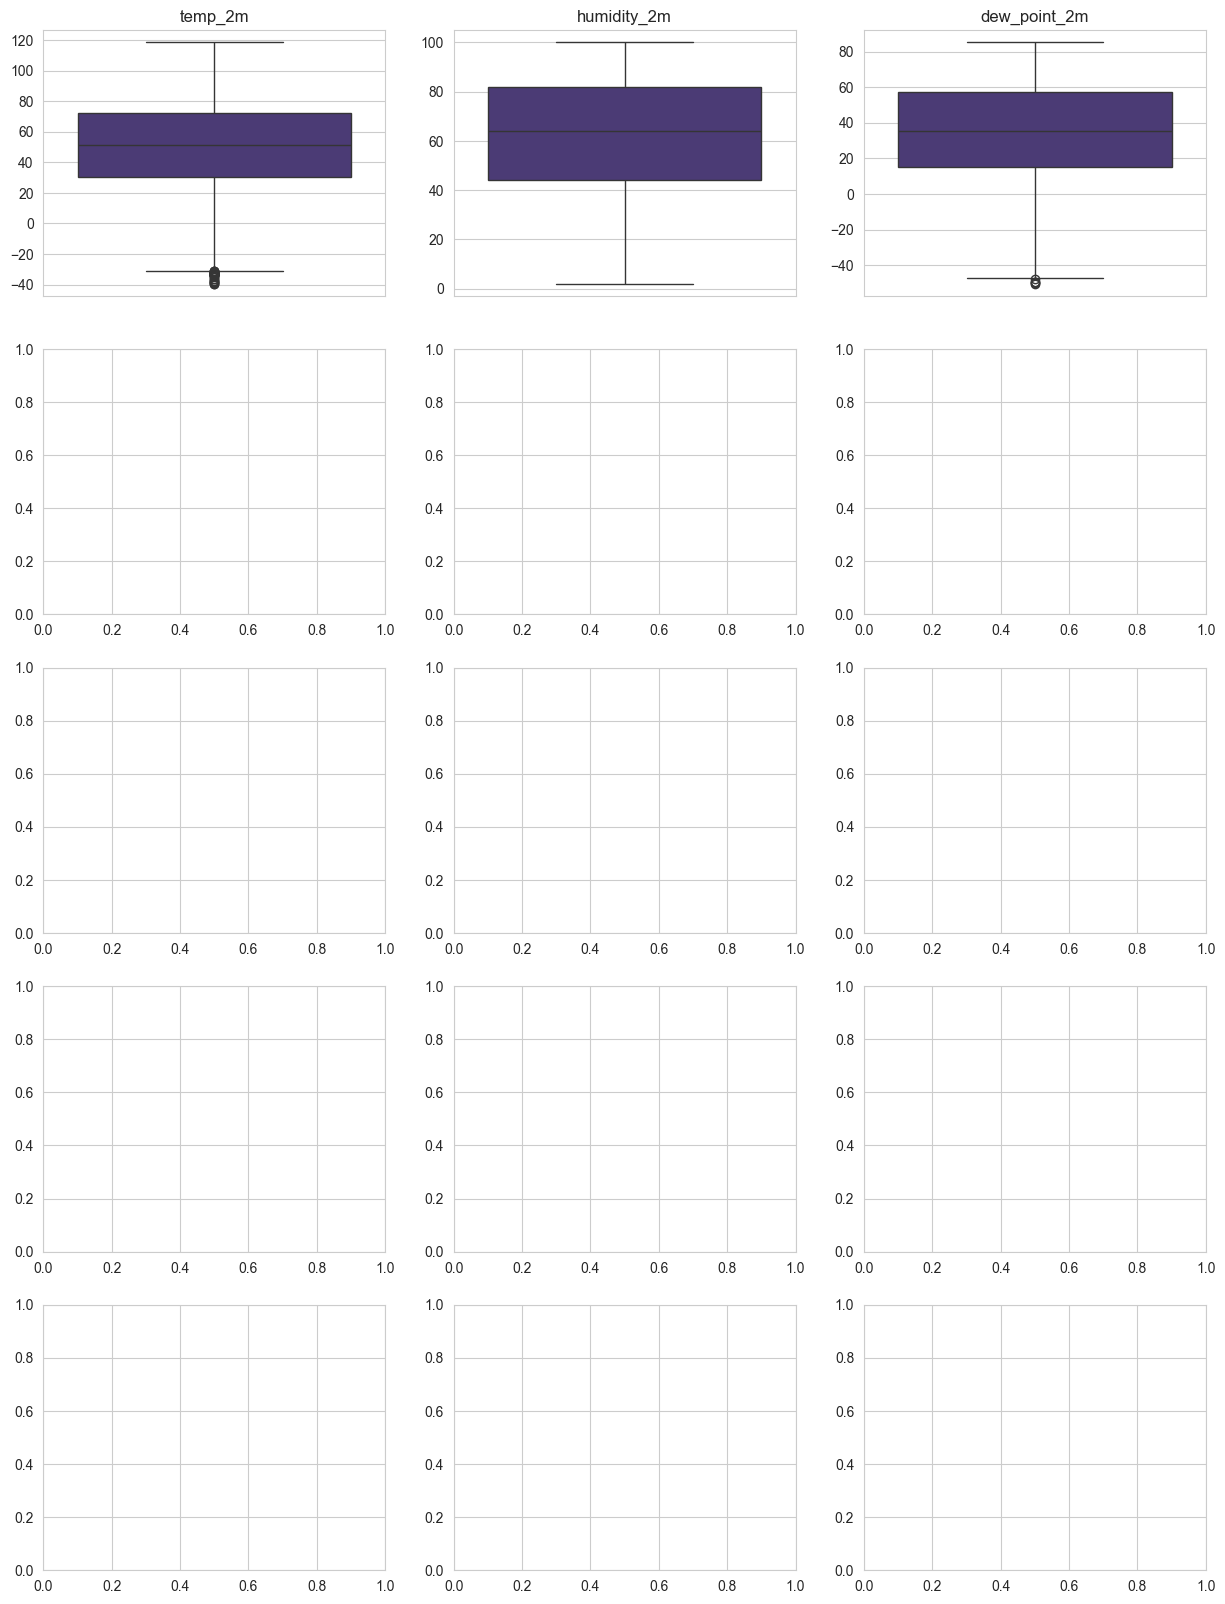

In [25]:
columns = [ 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 'rain', 'snowfall', 
              'snow_depth','msl_pressure', 'surface_pressure', 'cloud_cover_total', 
              'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0', 'vpd', 'wind_speed_10m', 
              'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 'wind_gusts_10m', 'soil_temp_0_7cm', 
              'soil_temp_7_28cm', 'soil_temp_28_100cm', 'soil_temp_100_255cm', 'soil_moisture_0_7cm', 
              'soil_moisture_7_28cm', 'soil_moisture_28_100cm']


color = sns.color_palette("viridis")
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(5, 3, figsize=(15, 20))
k = 0

for i in range(8):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(y=df[columns[k]], ax=ax1[i][j], palette=color)
            ax1[i][j].set_title(columns[k])
            ax1[i][j].set_ylabel(None)
            ax1[i][j].set_xlabel(None)
            k += 1
        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()


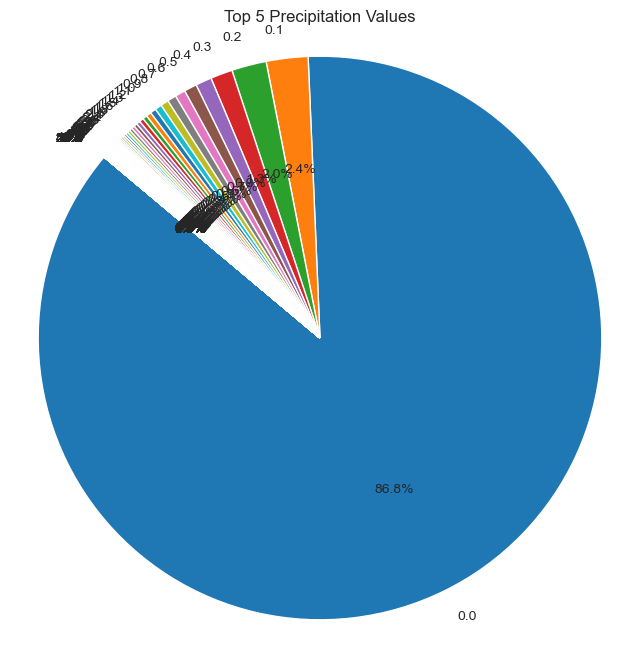

In [ ]:

precip_counts = df['precip'].value_counts()[:]

plt.figure(figsize=(8, 8))
plt.pie(precip_counts, labels=precip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Precipitation Values')
plt.axis('equal')

plt.show()

## Outlier removal

In [54]:
def mark_and_remove_outliers_iqr(df, columns):
    df_copy = df.copy()  # Create a copy of the dataframe
    outlier_mask = pd.Series([False] * len(df))  # Create a mask for marking outliers

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update the outlier mask: mark True if the value is an outlier
        outlier_mask = outlier_mask | (df[column] < lower_bound) | (df[column] > upper_bound)

    # Add a new column 'Outlier_Boxplot' to indicate outliers in the original dataframe
    df['outlier_boxplot'] = outlier_mask

    # Remove the outliers from the copy of the dataframe
    df_copy = df_copy[~outlier_mask]  # Keep only non-outlier rows

    return df, df_copy

# List of columns to check for outliers
columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp',
    'msl_pressure', 'surface_pressure', 'cloud_cover',
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m',
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

# Apply the function to mark outliers and create a copy without outliers
df, df_cleaned = mark_and_remove_outliers_iqr(df, columns)

# Display the original dataframe with the outlier column
display(df)





,time,temp_2m,humidity_2m,dew_point_2m,apparent_temp,precip,weather_code,msl_pressure,surface_pressure,cloud_cover,...,wind_speed_100m,wind_dir_10m,wind_dir_100m,soil_temp_0_7cm,soil_moisture_0_7cm,MahalanobisDistance,MahalanobisOutlier,MCDDistance,MCDOutlier,outlier_boxplot
0,1974-01-01T00:00,11.9,76,5.9,1.3,0.2,Snow fall: Slight,1026.1,1008.2,100,...,15.4,330,330,31.6,0.381,4.646655,False,6.682920,True,False
1,1974-01-01T01:00,11.1,77,5.2,0.4,0.1,Snow fall: Slight,1026.0,1008.1,100,...,16.0,328,329,31.6,0.380,4.605624,False,6.727623,True,False
2,1974-01-01T02:00,10.4,77,4.6,-0.2,0.0,Overcast,1027.4,1009.4,100,...,15.8,325,327,31.6,0.380,5.250980,True,7.499000,True,False
3,1974-01-01T03:00,9.3,78,3.9,-1.3,0.0,Overcast,1028.0,1010.0,82,...,16.3,323,324,31.6,0.380,4.962295,False,7.279868,True,False
4,1974-01-01T04:00,8.0,80,3.1,-2.4,0.0,Mainly clear,1028.4,1010.3,50,...,16.3,324,327,31.6,0.380,5.765282,True,8.309858,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445051,2024-10-08T19:00,69.0,32,38.3,67.2,0.0,Clear sky,1018.6,1002.8,0,...,2.9,8,9,69.9,0.242,4.694977,False,14.338805,True,False
445052,2024-10-08T20:00,69.6,33,39.2,67.0,0.0,Clear sky,1018.0,1002.2,0,...,3.0,357,358,71.0,0.241,4.469079,False,14.031690,True,False
445053,2024-10-08T21:00,69.6,33,39.5,66.0,0.0,Clear sky,1017.6,1001.8,0,...,3.2,358,358,71.3,0.239,4.466294,False,13.298639,True,False
445054,2024-10-08T22:00,68.9,35,40.1,65.1,0.0,Clear sky,1017.4,1001.6,0,...,3.9,2,2,70.4,0.239,4.149338,False,12.183705,True,False


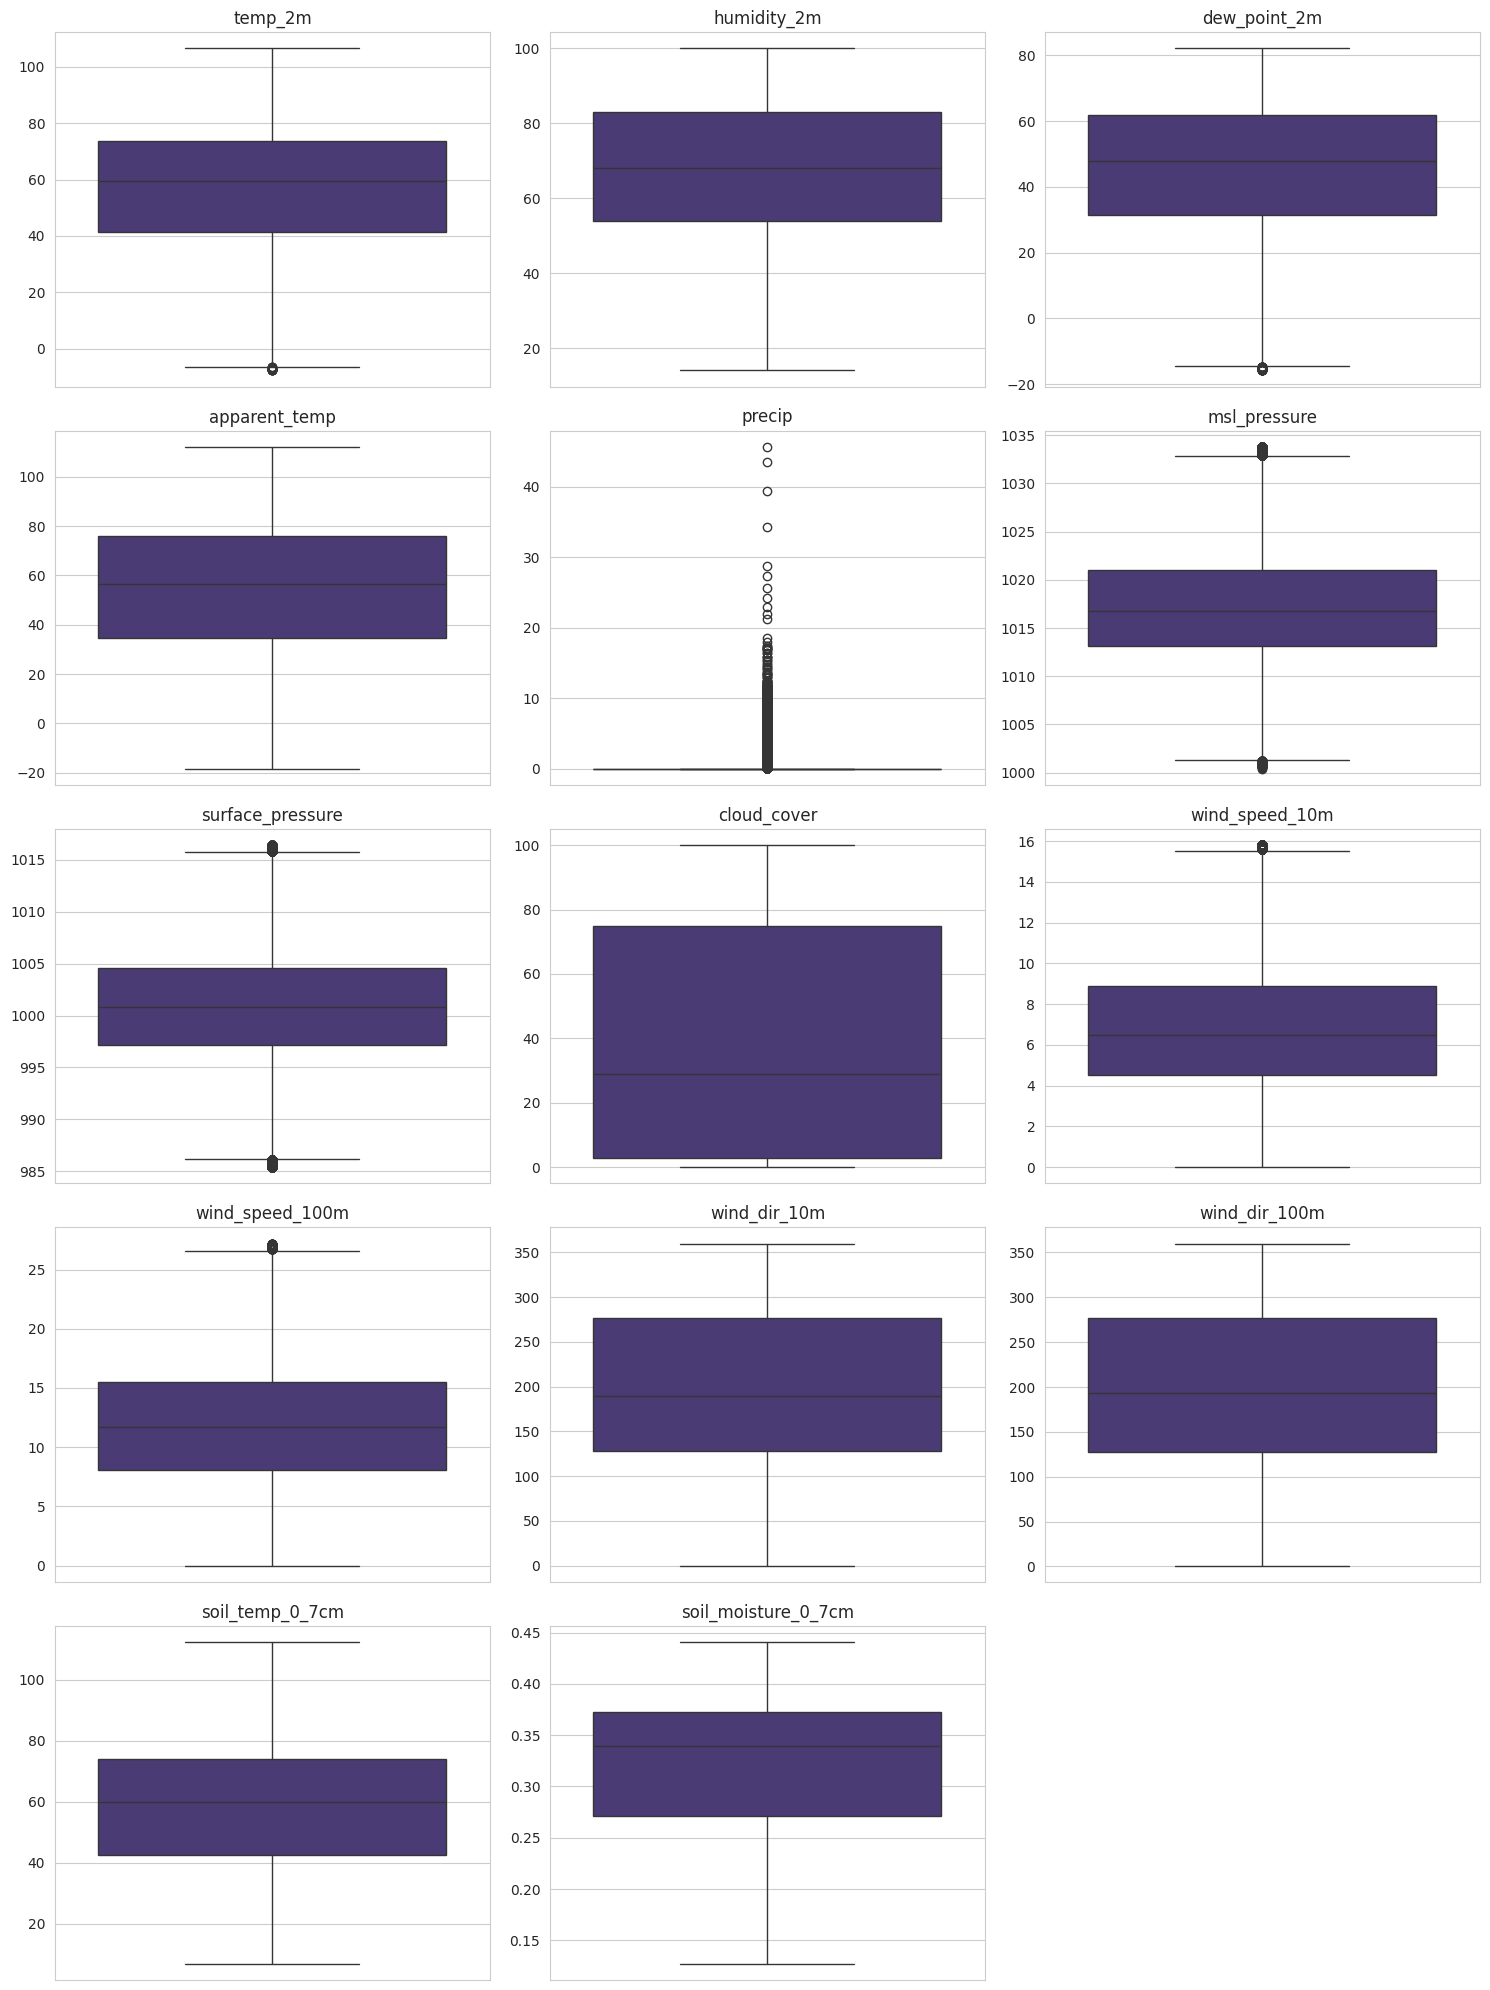

In [50]:
columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp',
    'precip', 'msl_pressure', 'surface_pressure', 'cloud_cover',
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m',
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

color = sns.color_palette("viridis")
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(5, 3, figsize=(15, 20))
k = 0

for i in range(5):
    for j in range(3):
        if k < len(columns):
            sns.boxplot(y=df_cleaned[columns[k]], ax=ax1[i][j], palette=color)
            ax1[i][j].set_title(columns[k])
            ax1[i][j].set_ylabel(None)
            ax1[i][j].set_xlabel(None)
            k += 1
        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()


# Time series visualization

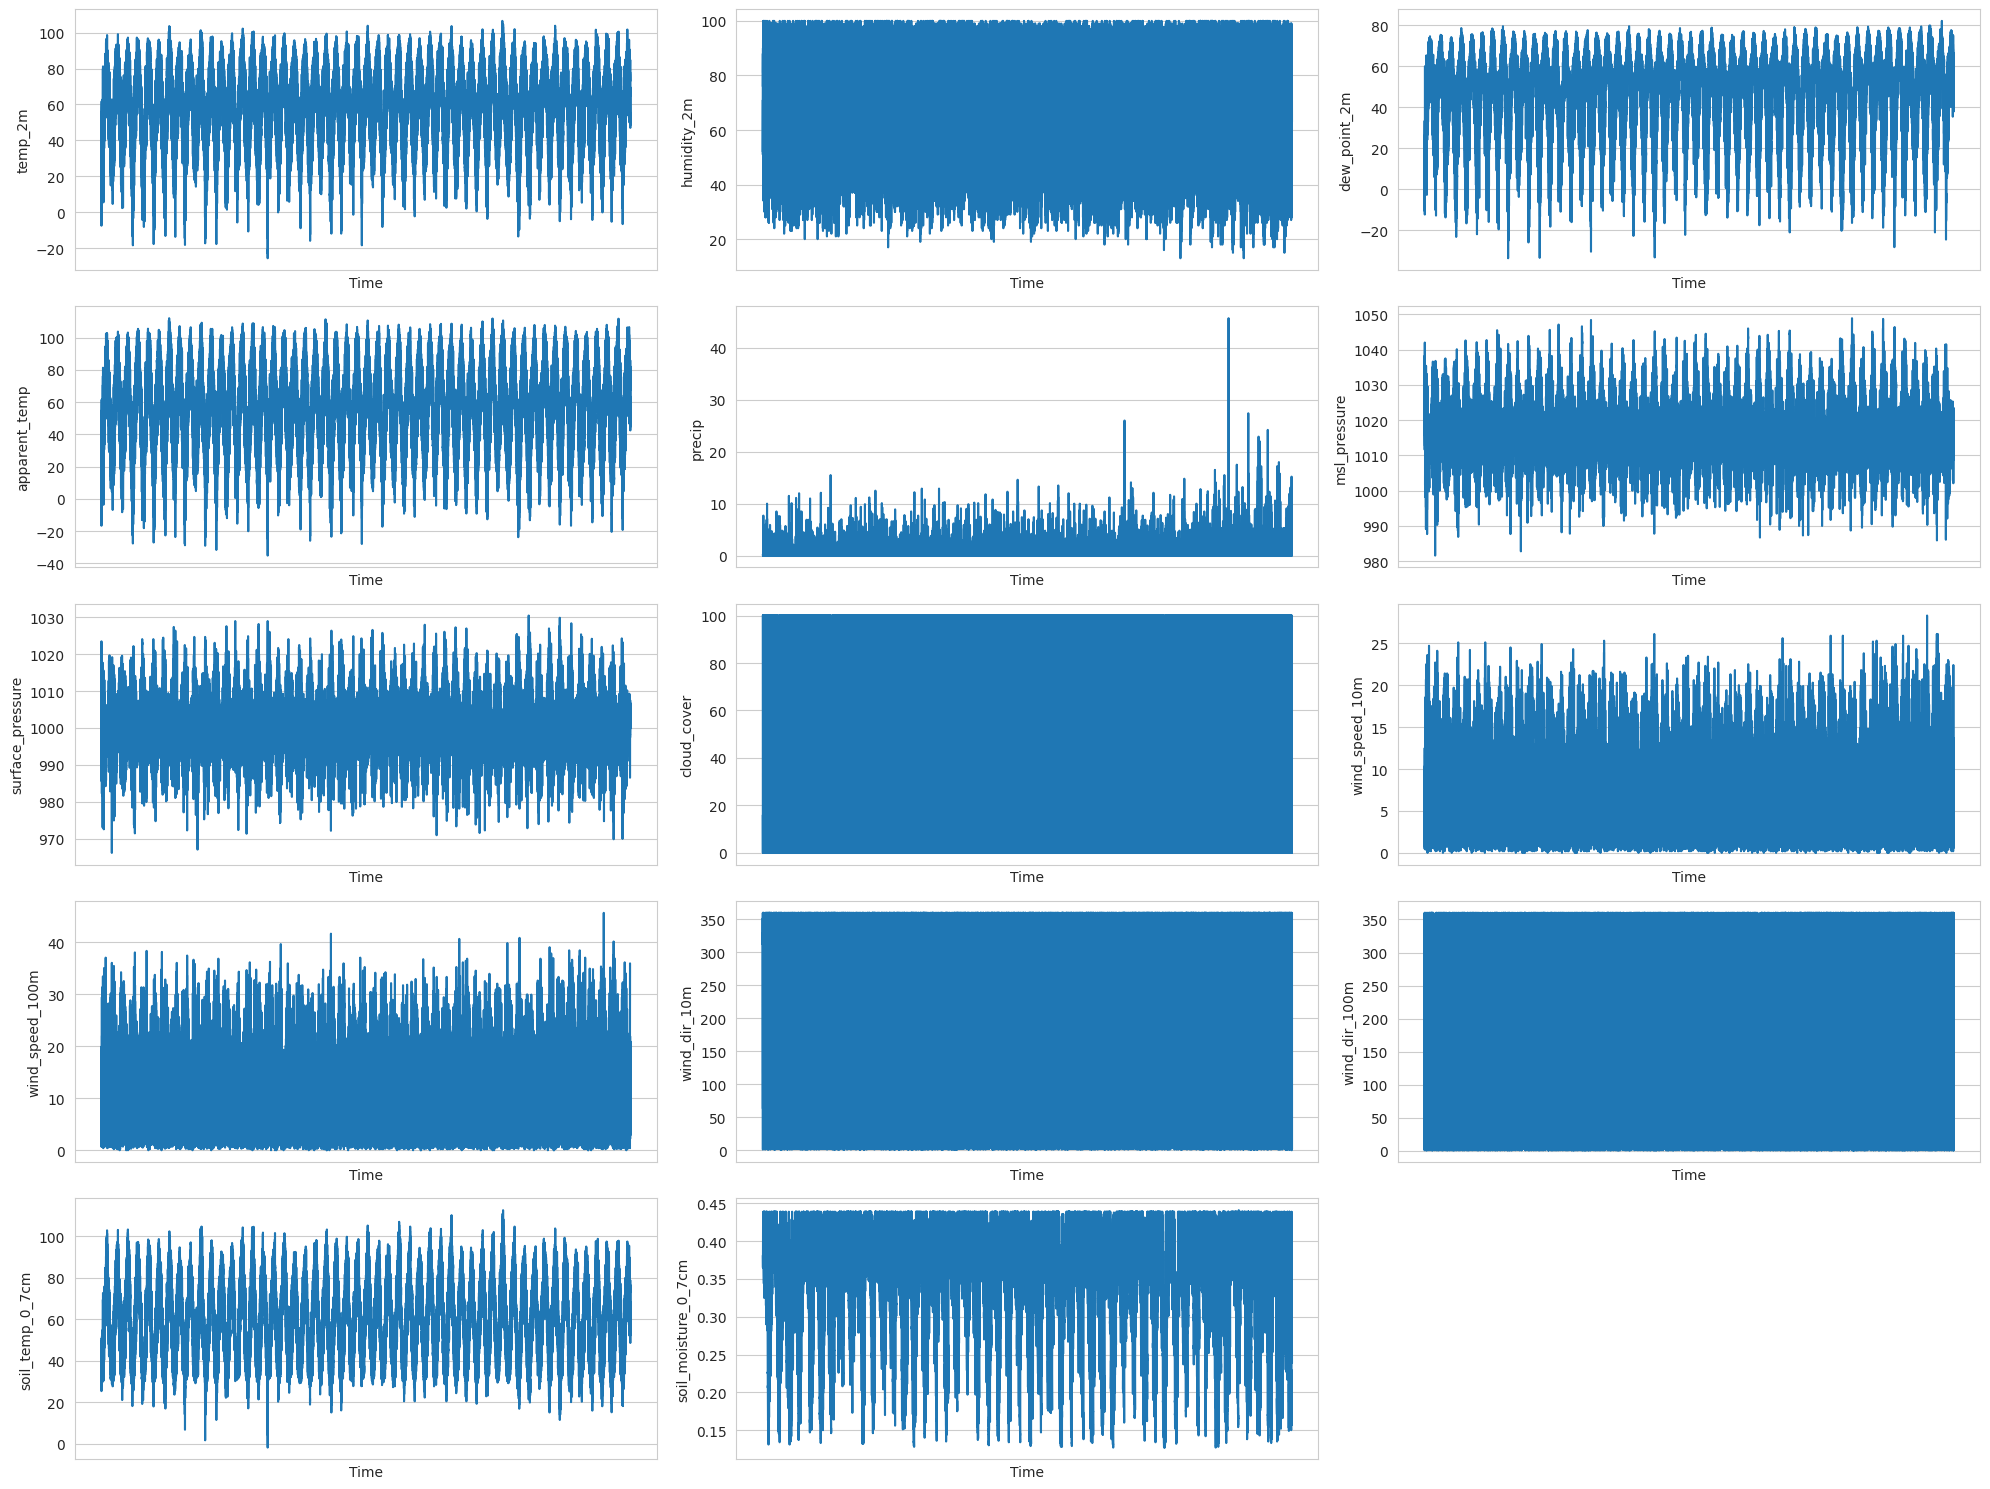

In [17]:
df['time'] = pd.to_datetime(df['time'])



fig, ax1 = plt.subplots(5, 3, figsize=(20, 15))
k = 0

columns = ['temp_2m',
    'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip',
    'msl_pressure', 'surface_pressure', 'cloud_cover',
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m',
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

for i in range(5):
    for j in range(3):
        if k < len(columns):
            ax =  sns.lineplot(x=df['time'], y=df[columns[k]], ax=ax1[i][j])
            #ax.set_title(f'Time vs {columns[k]}')
            ax.set_ylabel(columns[k])
            ax.set_xlabel('Time')

            ax.set_xticks([])

            k += 1
        else:
            ax1[i][j].set_visible(False)

plt.tight_layout()
plt.show()

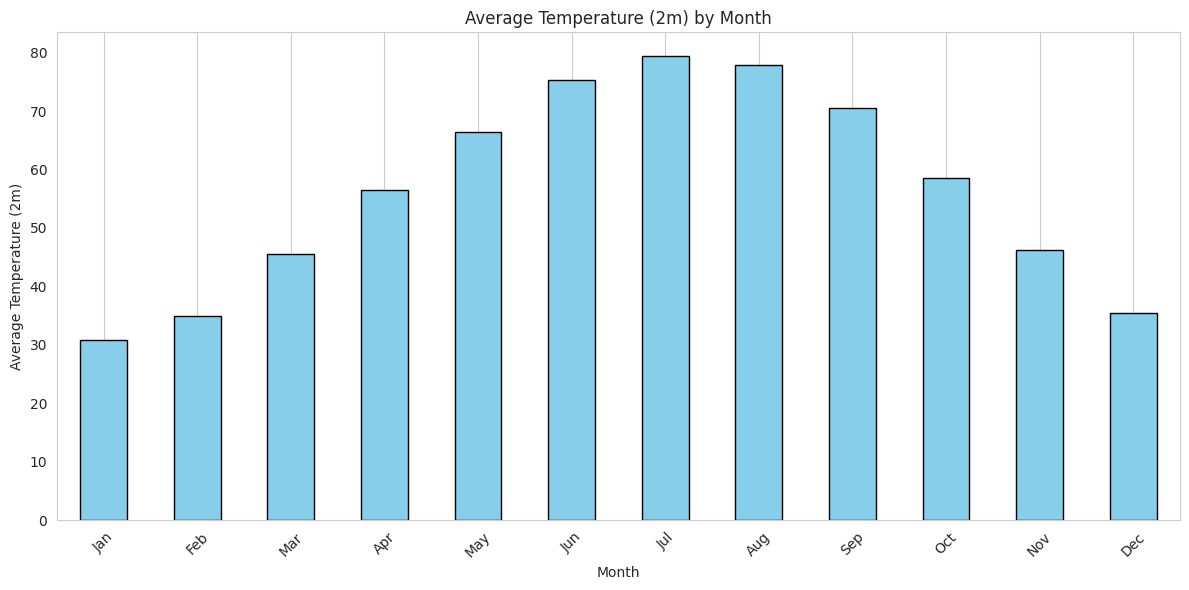

In [18]:
monthly_avg_temp = df.groupby(df['time'].dt.month)['temp_2m'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Temperature (2m) by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (2m)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Multivariate analysis

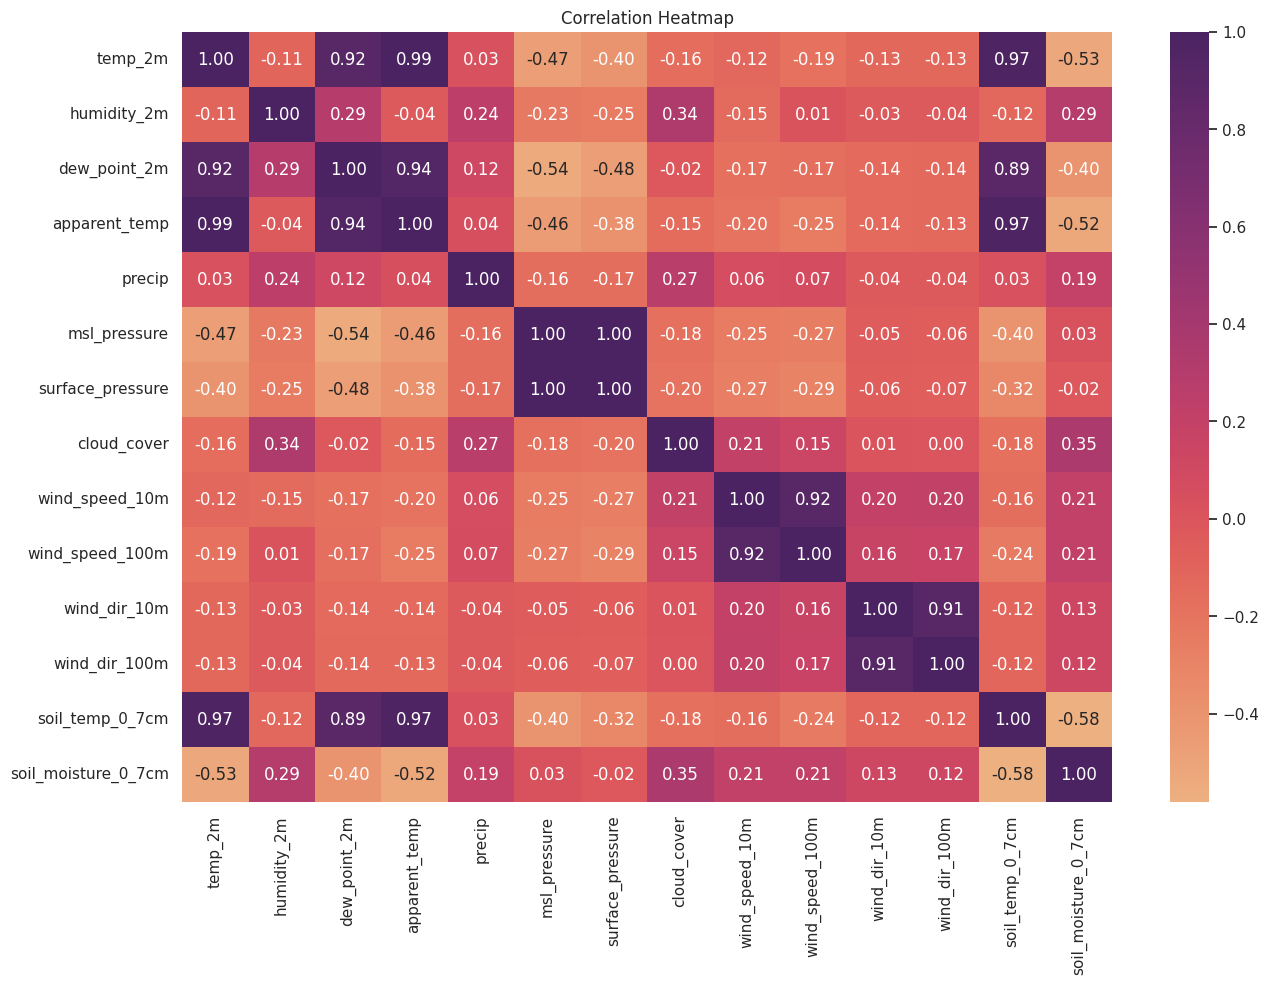

In [21]:
df_numeric = df.select_dtypes(include=[np.number])

sns.set(font_scale = 1)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

KeyboardInterrupt: 

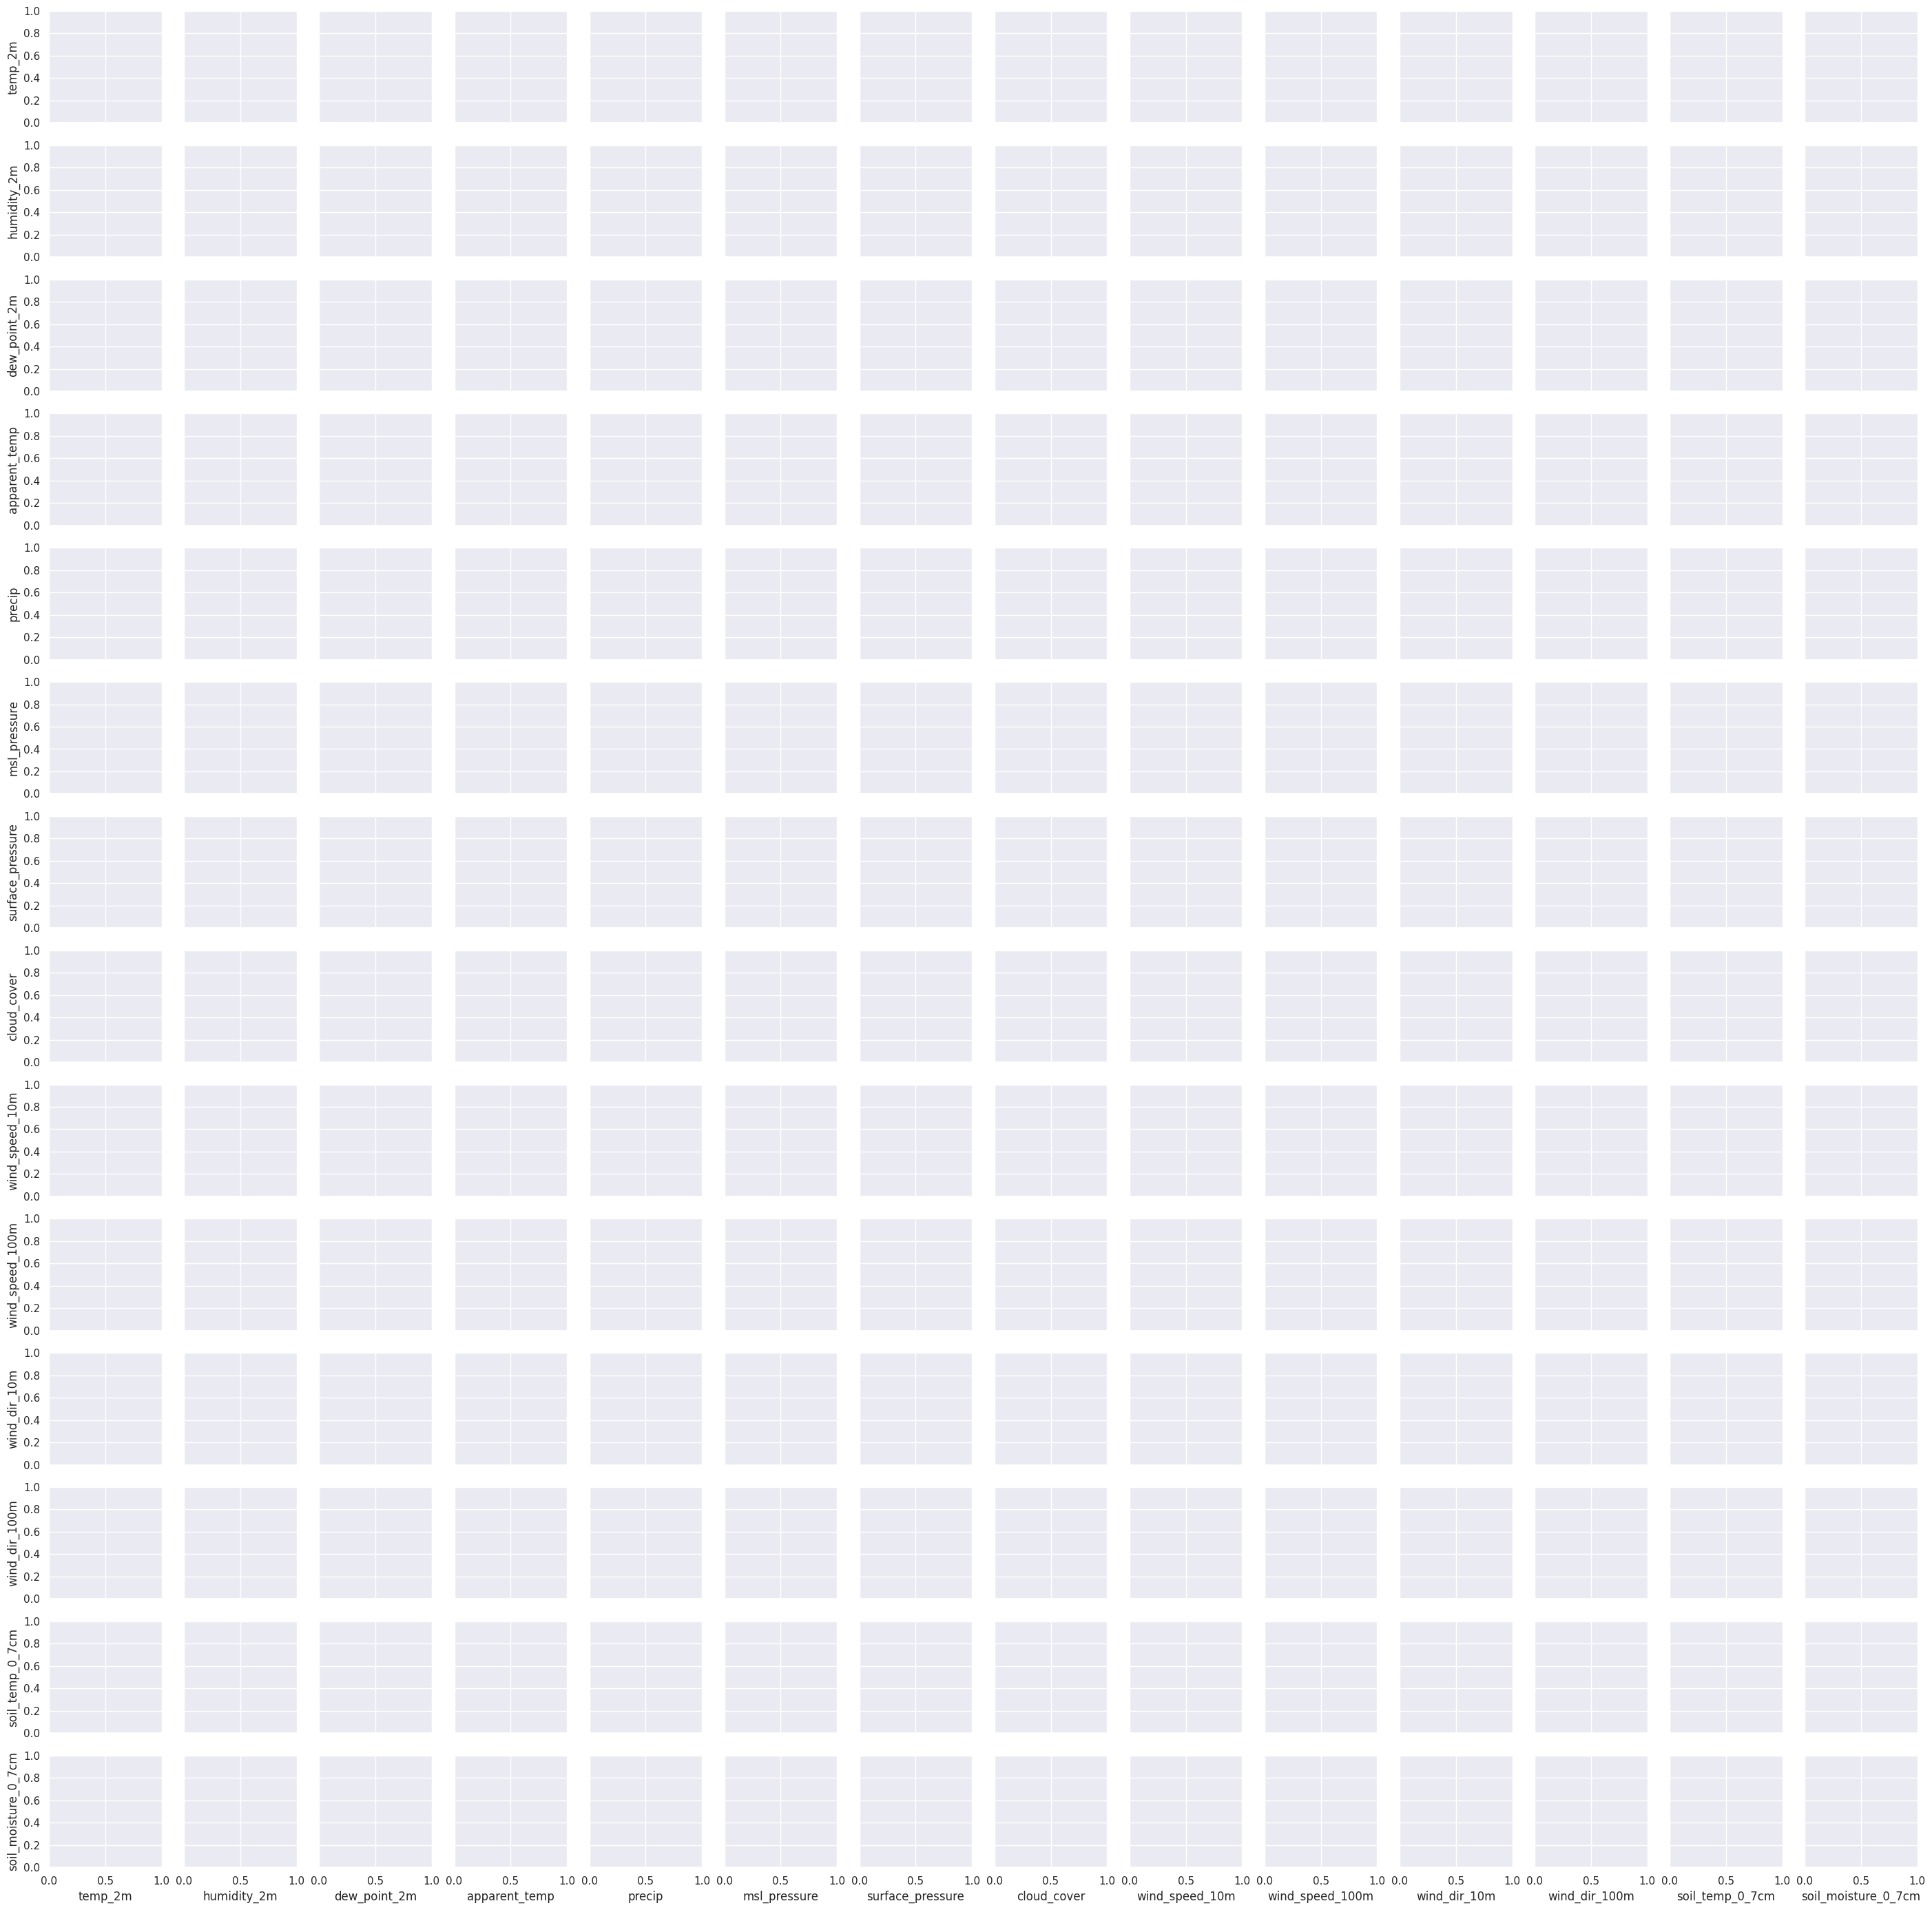

In [22]:
# Assuming your dataframe is named 'df' and you've selected only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Pairplot
sns.pairplot(df_numeric)
plt.show()


## Mahalanobis Method vs MCD method

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# Mahalanobis distance function (same as you already have)
def calculate_mahalanobis(data, mean, cov_matrix):
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    distances = []
    for i in range(data.shape[0]):
        diff = data[i] - mean
        dist = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
        distances.append(dist)
    return np.array(distances)

# Detect outliers using Mahalanobis Distance
def detect_outliers_mahalanobis(df, threshold=0.99):
    data = df.values
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    distances = calculate_mahalanobis(data, mean, cov_matrix)

    chi_squared_threshold = chi2.ppf(threshold, df=data.shape[1])

    outliers = np.where(distances > np.sqrt(chi_squared_threshold))

    return outliers[0], distances

# Detect outliers using MCD
def detect_outliers_mcd(df,threshold=0.99):
    data = df.values
    mcd = MinCovDet().fit(data)
    distances = mcd.mahalanobis(data)

    # Calculate the threshold based on chi-squared distribution
    threshold = np.sqrt(chi2.ppf(threshold, df=data.shape[1]))
    outliers = np.where(np.sqrt(distances) > threshold)

    return outliers[0], np.sqrt(distances)

# Select numeric columns
selected_columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp',
     'msl_pressure', 'surface_pressure', 'soil_moisture_0_7cm'
]


# Select only the specified numeric columns
df_numeric = df[selected_columns].select_dtypes(include=[np.number])



# Mahalanobis outliers
outliers_mahalanobis, mahalanobis_distances = detect_outliers_mahalanobis(df_numeric, threshold=0.99)

# MCD outliers
outliers_mcd, mcd_distances = detect_outliers_mcd(df_numeric, threshold=0.99)

# Add distances and outlier labels to DataFrame for Mahalanobis
df['MahalanobisDistance'] = mahalanobis_distances
df['MahalanobisOutlier'] = False
df.iloc[outliers_mahalanobis, df.columns.get_loc('MahalanobisOutlier')] = True

# Add distances and outlier labels to DataFrame for MCD
df['MCDDistance'] = mcd_distances
df['MCDOutlier'] = False
df.iloc[outliers_mcd, df.columns.get_loc('MCDOutlier')] = True






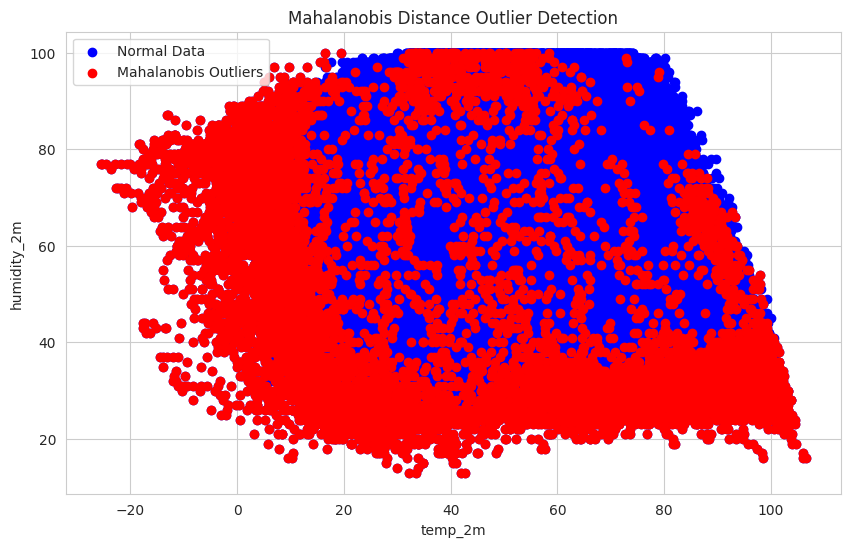

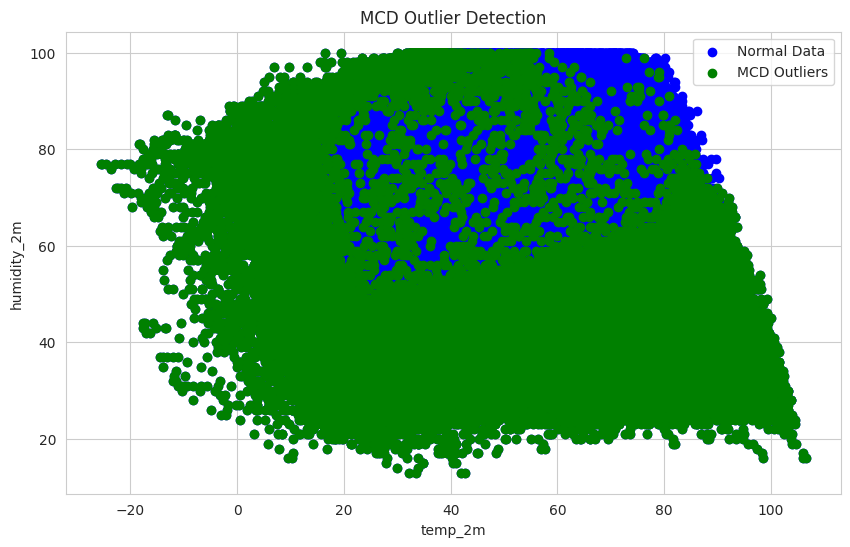

In [76]:
# Visualization

# Plot for Mahalanobis
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
plt.scatter(df_numeric.iloc[outliers_mahalanobis, 0], df_numeric.iloc[outliers_mahalanobis, 1], c='red', label='Mahalanobis Outliers')
plt.title('Mahalanobis Distance Outlier Detection')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend()
plt.show()

# Plot for MCD
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
plt.scatter(df_numeric.iloc[outliers_mcd, 0], df_numeric.iloc[outliers_mcd, 1], c='green', label='MCD Outliers')
plt.title('MCD Outlier Detection')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend()
plt.show()






In [ ]:
#  Side-by-side comparison of both methods
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Mahalanobis plot
axes[0].scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
axes[0].scatter(df_numeric.iloc[outliers_mahalanobis, 0], df_numeric.iloc[outliers_mahalanobis, 1], c='red', label='Mahalanobis Outliers')
axes[0].set_title('Mahalanobis Distance Outlier Detection')
axes[0].set_xlabel(df_numeric.columns[0])
axes[0].set_ylabel(df_numeric.columns[1])
axes[0].legend()

# MCD plot
axes[1].scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c='blue', label='Normal Data')
axes[1].scatter(df_numeric.iloc[outliers_mcd, 0], df_numeric.iloc[outliers_mcd, 1], c='green', label='MCD Outliers')
axes[1].set_title('MCD Outlier Detection')
axes[1].set_xlabel(df_numeric.columns[0])
axes[1].set_ylabel(df_numeric.columns[1])
axes[1].legend()

plt.show()


(array([     0,      1,      2, ..., 445033, 445044, 445055], dtype=int64),)

In [64]:
df.loc[df['MahalanobisOutlier']==True].shape[0]


16075

In [65]:
df.loc[df['MCDOutlier']==True].shape[0]

129819

In [55]:
df.loc[df['outlier_boxplot']==True].shape[0]

21827